In [1]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import webtext

In [3]:
for i in webtext.sents():
    print(i)

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.']
['[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.']
['#', 'ifdefs', 'for', 'MOZ_PHOENIX', 'customize', 'dialog', "'", 's', 'toolbar', 'has', 'small', 'icons', 'when', 'small', 'icons', 'is', 'not', 'checked', 'nightly', 'builds', 'and', 'tinderboxen', 'for', 'Phoenix', 'finish', 'tearing', 'prefs', 'UI', 'to', 'pieces', 'and', 'then', 'make', 'it', 'not', 'suck', '"', 'mozbrowser', '"', 'script', 'doesn', "'", 't', 'start'

['He', 'will', 'beat', 'us', 'easily', '...', '[', 'boom', ']', 'DINGO', ':', 'Oh', ',', 'shit', '.']
['LAUNCELOT', ':', 'We', 'were', 'in', 'the', 'nick', 'of', 'time', '.']
['You', 'were', 'in', 'great', 'peril', '.']
['GALAHAD', ':', 'I', 'don', "'", 't', 'think', 'I', 'was', '.']
['LAUNCELOT', ':', 'Yes', 'you', 'were', '.']
['You', 'were', 'in', 'terrible', 'peril', '.']
['GALAHAD', ':', 'Look', ',', 'let', 'me', 'go', 'back', 'in', 'there', 'and', 'face', 'the', 'peril', '.']
['LAUNCELOT', ':', 'No', ',', 'it', "'", 's', 'too', 'perilous', '.']
['GALAHAD', ':', 'Look', ',', 'it', "'", 's', 'my', 'duty', 'as', 'a', 'knight', 'to', 'sample', 'as', 'much', 'peril', 'as', 'I', 'can', '.']
['LAUNCELOT', ':', 'No', ',', 'we', "'", 've', 'got', 'to', 'find', 'the', 'Holy', 'Grail', '.']
['Come', 'on', '!']
['GALAHAD', ':', 'Oh', ',', 'let', 'me', 'have', 'just', 'a', 'little', 'bit', 'of', 'peril', '?']
['LAUNCELOT', ':', 'No', '.']
['It', "'", 's', 'unhealthy', '.']
['GALAHAD', ':', 'I

['Bag', 'lady', ':', 'Could', 'someone', 'spare', 'some', 'change', '?']
['My', 'welfare', 'was', 'denied', '.']
['Crazy', 'lady', ':', 'Yeah', ',', 'yeah', ',', 'they', 'denied', 'mine', 'the', 'first', 'time', 'too', '.']
['Get', 'over', 'it', '.']
['Man', ':', 'Does', 'anyone', 'know', 'how', 'to', 'get', 'to', '--', 'Crazy', 'lady', ':', 'They', 'aren', "'", 't', 'listening', ',', 'they', 'aren', "'", 't', 'going', 'to', 'talk', 'to', 'you', '.']
['They', 'can', "'", 't', 'talk', '.']
['They', 'are', 'all', 'mute', '.']
['Asian', 'chick', ':', 'So', 'that', "'", 's', 'it', ',', 'then', '?']
['Asian', 'guy', ':', 'Yep', '.']
['Asian', 'chick', ':', 'We', "'", 're', 'breaking', 'up', ',', 'then', '?']
['Asian', 'guy', ':', 'Yep', '.']
['A', 'few', 'minutes', 'pass', '.']
['Asian', 'chick', ':', 'Hey', ',', 'you', "'", 'd', 'look', 'good', 'with', 'that', 'girl', 'up', 'there', 'in', 'the', 'pink', 'checked', 'coat', '.']
['Tourist', 'lady', '#', '1', ':', 'Is', 'this', 'it', '?']
['T

['Man', ':', 'Do', 'you', 'guys', 'want', 'food', 'or', 'sushi', '?']
['Little', 'girl', ':', 'Mom', ',', 'did', 'you', 'know', 'there', 'is', 'no', 'pudding', 'in', 'kid', 'jail', '?']
['Suit', ':', 'I', 'mean', ',', 'you', "'", 're', 'a', 'cool', 'guy', ';', 'you', 'have', 'wavy', 'hair', ',', 'you', 'chew', 'gum', '.']
['Man', 'on', 'pay', 'phone', ':', 'What', 'do', 'you', 'want', '?']
['Do', 'you', 'want', 'some', 'soup', '?']
['?...', 'Answer', 'me', '!']
['Hipster', 'guy', ':', 'Excuse', 'me', ',', 'miss', '.']
['You', 'have', 'a', 'noodle', 'on', 'your', 'chin', '.']
['Drunk', 'girl', ':', 'And', 'shrimp', 'is', 'round', '.']
['Not', 'a', 'color', ',', 'but', 'round', '.']
['that', '!']
['I', "'", 'm', 'going', 'home', '!']
['Guy', ':', 'I', 'hate', 'when', 'people', 'swallow', 'their', 'gum', '.']
['My', 'mom', 'does', 'that', '.']
['You', 'know', ',', 'when', 'you', 'swallow', 'your', 'gum', ',', 'it', 'gets', 'stuck', 'in', 'your', 'heart', '.']
['Hobo', ':', 'Aw', ',', 'man

['Girl', ':', 'Yeah', ',', 'and', 'one', 'time', 'he', 'asked', 'me', 'if', 'we', 'could', 'just', 'fuck', 'without', 'kissing', '.']
['Guy', 'on', 'cell', ':', 'You', 'know', ',', 'I', 'think', 'I', "'", 'm', 'man', 'enough', 'for', 'three', 'women', '.']
['Dude', ':', 'I', "'", 'd', 'let', 'him', 'fuck', 'my', 'sister', '.']
['He', "'", 's', 'a', 'good', 'guy', '.']
['Dude', 'on', 'cell', ':', 'I', 'wanna', 'see', 'you', '.']
['I', 'wanna', 'feel', 'you', ',', 'too', '.']
['I', 'wanna', 'feel', 'you', 'inside', 'me', '.']
['And', 'suck', 'on', 'those', 'titties', ',', 'mmm', '.']
['Hobo', ':', 'Well', ',', 'mathematically', 'speaking', ',', 'I', "'", 'm', 'fucked', '.']
['Hobo', ':', 'I', 'don', "'", 't', 'steal', '.']
['I', 'don', "'", 't', 'snatch', 'purses', '.']
['I', 'don', "'", 't', 'bother', 'women', '.']
['But', 'don', "'", 't', 'get', 'me', 'wrong', ',', 'I', "'", 'm', 'not', 'a', 'homosexual', '.']
['But', 'I', 'do', 'bathe', '.']
['And', 'I', 'do', 'sleep', 'on', 'the', 's

['Girl', ':', 'So', 'wait', ',', 'it', "'", 's', 'garlic', 'that', 'you', 'use', '?']
['Guy', ':', 'Yes', ',', 'who', 'heard', 'of', 'scaring', 'them', 'with', 'bologna', '?']
['Girl', ':', 'Wasn', "'", 't', 'it', 'in', 'that', 'movie', '?...', 'Oh', 'wait', ',', 'that', 'was', 'robots', '.']
['Girl', ':', 'The', 'other', 'day', 'I', 'saw', 'a', 'homeless', 'guy', 'masturbating', 'in', 'Union', 'Square', 'Park', '.']
['Guy', ':', 'Well', ',', 'where', 'else', 'was', 'he', 'going', 'to', 'do', 'it', '?']
['Girl', '#', '1', ':', 'Did', 'you', 'see', 'those', 'other', 'glasses', 'I', 'tried', 'on', '?']
['Girl', '#', '2', ':', 'Yeah', '.']
['Girl', '#', '1', ':', 'I', 'looked', 'like', 'Amelia', 'Earhart', '.']
['Guy', '#', '1', ':', 'Dude', ',', 'all', 'this', 'Groundhog', 'Day', 'shit', 'is', 'bullshit', '.']
['It', 'is', 'impossible', 'for', 'something', 'to', 'not', 'have', 'a', 'shadow', '.']
['All', 'things', 'that', 'move', 'have', 'shadows', '.']
['If', 'it', 'don', "'", 't', 'mov

['Conductor', ':', 'Ladies', 'and', 'gentlemen', ',', 'this', 'Q', 'train', 'is', 'currently', 'making', 'local', 'stops', 'due', 'to', 'the', '12', 'cups', 'of', 'snow', 'outside', '.']
['Dude', ':', 'No', 'way', ',', 'fuck', ',', 'wind', '!']
['Girl', ':', 'Sometimes', 'you', 'can', "'", 't', 'see', 'love', ',', 'but', 'you', 'can', 'feel', 'it', '.']
['It', "'", 's', 'like', 'the', 'wind', '.']
['Asian', 'girl', ':', 'Whoa', '!']
['It', "'", 's', 'raining', 'ice', '!']
['Girl', ':', 'They', 'look', 'slutty', '.']
['Slutty', 'people', 'don', "'", 't', 'get', 'cold', '.']
['Hobo', ':', 'This', 'weather', 'crazy', '.']
['Father', 'Nature', 'caught', 'Mother', 'Nature', 'cheatin', "'", 'on', 'him', ',', 'got', 'mad', ',', 'and', 'dropped', 'some', 'damn', 'snow', 'on', 'us', '!']
['Girl', ':', '...', 'I', 'mean', ',', 'who', 'doesn', "'", 't', 'like', 'being', 'warm', '?']
['It', "'", 's', 'not', 'like', 'they', 'call', 'it', '"', 'Global', 'Sweltering', '"!']
['So', 'who', 'cares', '?'

['Girl', ':', 'Do', 'you', 'have', 'any', 'exciting', 'plans', 'for', 'tonight', '?']
['Guy', ':', 'No', '.']
['Do', 'you', 'want', 'to', 'have', 'a', 'hot', 'dog', 'eating', 'contest', '?']
['Girl', ':', 'Not', 'so', 'much', ',', 'since', 'I', "'", 'm', 'a', 'vegetarian', '.']
['Guy', ':', 'I', 'guess', 'I', 'win', ',', 'then', '.']
['Old', 'lady', '#', '1', ':', 'Oh', ',', 'how', 'awful', '!']
['You', 'cut', 'your', 'dog', "'", 's', 'ears', '.']
['How', 'horrible', '!']
['How', "'", 'd', 'you', 'like', 'to', 'have', 'your', 'ears', 'trimmed', '?']
['Old', 'lady', '#', '2', ':', 'I', 'would', '.']
['Hobo', ':', 'So', 'I', 'beat', 'her', 'ass', 'good', '!']
['I', 'told', 'her', ',', 'don', "'", 't', 'you', 'ever', 'say', 'you', "'", 'll', 'leave', 'me', '!...', 'Hey', 'man', ',', 'you', 'got', 'an', 'extra', 'cigarette', '?']
['Suit', ':', 'Nope', ',', 'last', 'one', '.']
['Hobo', ':', 'Come', 'on', ',', 'man', ',', 'why', 'can', "'", 't', 'we', 'all', 'love', 'each', 'other', 'in', 'u

['Girl', ':', 'Omigod', '!']
['I', 'saw', 'you', 'on', 'the', 'internet', '!']
['Hobo', ':', 'You', "'", 're', 'like', 'the', 'hundredth', 'person', 'to', 'tell', 'me', 'that', 'tonight', '.']
['(', 'cf', '.']
['this', 'entry', '.)']
['Black', 'man', ':', 'Why', "'", 'd', 'you', 'do', 'that', '?']
['Throwing', 'that', 'money', 'at', 'me', '.']
['You', "'", 're', 'stupid', '.']
['Here', ',', 'give', 'it', 'to', 'me', '...', 'You', "'", 're', 'stupid', '.']
['Why', 'did', 'you', 'throw', 'the', 'money', 'at', 'me', '?']
['Cashier', 'guy', ':', 'I', 'set', 'it', 'down', '!']
['I', 'didn', "'", 't', 'throw', 'it', '.']
['Black', 'man', ':', 'You', "'", 're', 'stupid', '!']
['Manager', 'guy', ':', 'Why', 'do', 'you', 'have', 'to', 'make', 'it', 'personal', '?']
['Black', 'man', ':', 'Mind', 'your', 'own', 'business', '.']
['Tour', 'chick', ':', 'Have', 'you', 'been', 'to', 'Ground', 'Zero', 'yet', '?']
['Teen', 'girl', ':', 'You', 'mean', 'the', 'club', '?']
['Little', 'boy', ':', 'Mommy', 

['Woman', 'on', 'cell', ':', 'So', ',', 'your', 'man', 'coming', 'with', 'you', 'tonight', ',', 'or', 'he', 'still', 'locked', 'up', '?']
['Hobo', 'collecting', 'bottles', ':', 'Man', ',', 'I', "'", 'm', 'getting', 'too', 'skinny', ',', 'I', 'gotta', 'go', 'back', 'to', 'jail', '.']
['Queer', 'to', 'his', 'friend', 'after', 'hearing', 'raucous', 'cheering', 'coming', 'out', 'of', 'a', 'bar', ':', 'Straight', 'people', 'are', 'tiresome', ',', 'yet', 'amusing', 'at', 'the', 'same', 'time', '.']
['Teen', 'girl', 'smelling', 'a', 'candle', ':', 'Smells', 'like', 'lesbian', '.']
['Woman', ':', 'That', 'movie', "'", 's', 'so', 'stupid', '!']
['They', 'got', 'King', 'Kong', 'and', 'the', 'dinosaurs', 'fighting', 'even', 'though', 'they', 'are', 'from', 'different', 'centuries', '.']
['Teen', 'girl', ':', 'You', 'know', ',', 'I', 'don', "'", 't', 'think', 'I', 'even', 'in', 'dinosaurs', '.']
['Shopping', 'girl', ':', 'Look', ',', 'those', 'are', 'pre', '-', 'viewed', '!']
['Wait', ',', 'what',

['Guy', '#', '1', ':', 'Yo', 'son', 'I', 'got', 'head', 'from', 'a', 'blind', 'chick', 'the', 'other', 'day', 'Guy', '#', '2', ':', 'Wait', ',', 'so', 'did', 'she', 'know', '?']
['Drunk', 'guy', ':', 'Exuse', 'me', ',', 'miss', ',', 'do', 'you', 'see', 'that', 'woman', 'over', 'there', '?']
['Miss', ':', 'Yes', '?']
['Drunk', 'guy', ':', 'She', 'looks', 'in', 'that', 'dress', ',', 'don', "'", 't', 'you', 'think', '?']
['Miss', ':', 'Um', '.']
['.']
['.']
['Drunk', 'guy', ':', 'If', 'she', 'were', 'my', 'wife', 'I', 'would', 'let', 'her', 'wear', 'that', 'out', 'of', 'the', 'house', '!']
['Girl', '#', '1', ':', 'I', 'think', 'I', 'should', 'get', 'these', 'high', 'heel', 'shoes', "'", 'cause', 'Joe', 'is', 'really', 'tall', 'so', 'I', 'need', 'to', 'like', ',', 'be', 'able', 'to', 'reach', 'him', 'when', 'I', "'", 'm', 'giving', 'him', 'head', '.']
['Girl', '#', '2', ':', 'But', '...', 'how', 'would', 'that', 'help', '?']
['You', "'", 're', 'gonna', 'be', 'on', 'your', 'knees', 'anyway'

['Airport', 'security', ':', 'Sir', ',', 'we', "'", 've', 'been', 'informed', 'that', 'you', 'are', 'carrying', 'a', 'firearm', 'aboard', 'this', 'plane', '.']
['Suit', ':', 'WHAT', '?!']
['Flight', 'attendant', ':', 'I', 'overheard', 'him', 'say', 'he', 'was', 'going', 'to', 'disassemble', 'his', 'firearm', '!']
['Suit', ':', 'FLY', 'ROD', '!']
['Disassemble', 'my', 'FLY', 'ROD', '!']
['Flight', 'attendant', ':', 'Oh', '.']
['Whoops', '.']
['Guy', 'at', 'register', ':', 'So', ',', 'where', 'do', 'you', 'go', 'to', 'college', '?']
['Girl', 'checking', 'out', 'with', 'mom', ':', 'Erm', ',', 'Wellesley', '.']
['Guy', 'at', 'register', ':', 'Oh', 'no', 'way', '!']
['I', 'went', 'to', 'Wellesley', '!']
['How', 'is', 'it', 'these', 'days', '?']
['Guy', '#', '1', 'to', 'guy', '#', '2', ':', 'Those', 'sunglasses', 'look', 'really', 'good', 'on', 'you', '.']
['They', 'go', 'nicely', 'with', 'your', 'complexion', '.']
['Guy', '#', '3', ':', 'That', 'was', 'an', 'amazingly', 'Fab', 'Five', 'mome

['Mother', ':', 'We', 'need', 'to', 'find', 'Sound', 'of', 'Music', 'for', 'your', 'brother', '.']
['Child', ':', 'No', '!']
['I', 'want', 'to', 'watch', 'Star', 'Wars', 'Mother', ':', 'You', 'can', 'watch', 'this', '.']
['It', 'has', 'Nazis', '!--', 'Kim', "'", 's', 'Video', ',', 'Morningside', 'Heights']
['Caribbean', 'woman', '#', '1', ':', '...', 'and', 'so', 'I', 'tol', "'", 'him', ',', '"', 'You', 'betta', 'take', 'your', 'balls', ',', 'put', 'them', 'in', 'your', 'hand', ',', 'and', 'do', 'ya', 'job', '."']
['Caribbean', 'woman', '#', '2', ':', 'Mmm', 'hmm', '.']
['Little', 'girl', ':', 'Daddy', ',', 'how', 'many', 'stops', 'are', 'on', 'this', 'train', '?']
['Dad', ':', 'Just', 'one', '.']
['It', 'goes', 'back', 'and', 'forth', ',', 'back', 'and', 'forth', 'all', 'day', '.']
['Little', 'girl', ':', 'No', 'it', 'doesn', "'", 't', '.']
['Dad', ':', 'Would', 'I', 'lie', '?']
['Little', 'girl', ':', 'Sometimes', 'you', 'do', '.']
['Girl', ':', 'Am', 'I', 'ugly', '?']
['Boy', ':', '

['Tourist', 'kid', ':', 'Mom', ',', 'am', 'I', 'fat', '?']
['Tourist', 'mom', ':', 'Yes', '.']
['Now', 'get', 'in', 'the', 'airplane', '.']
['Tourist', 'kid', ':', 'Dad', 'says', 'I', "'", 'm', 'husky', '.']
['Tourist', 'mom', ':', 'That', 'means']
['Man', '#', '1', ':', 'I', 'mean', ',', 'I', 'don', "'", 't', 'feel', 'guilty', 'about', 'this', '.']
['Man', '#', '2', ':', 'Yeah', '.']
['Yeah', ',', 'I', 'know', '.']
['Man', '#', '1', ':', 'I', 'put', 'a', 'lot', 'in', 'this', 'relationship', '.']
['Man', '#', '2', ':', 'Yeah', '.']
['Yeah', '.']
['Man', '#', '1', ':', 'I', 'took', 'time', 'out', 'from', 'work', '.']
['Time', 'from', 'the', 'club', '.']
['Time', 'from', 'my', 'wife', 'and', 'kids', '.']
['Father', ':', 'Look', 'at', 'that', 'sign', '.']
['What', 'do', 'you', 'think', 'means', '?']
['Son', ':', 'I', 'don', "'", 't', 'know', '.']
['Father', ':', 'Look', 'at', 'the', 'picture', '.']
['Son', ':', 'Oh', ',', '!']
['So', 'it', "'", 's', ',', 'like', ',', 'an', 'Applebee', "'"

['Girlfriend', ':', 'You', 'could', 'just', 'be', 'gay', '.']
['Boyfriend', ':', 'I', 'don', "'", 't', 'want', 'to', 'be', 'gay', '!']
['I', 'just', 'wanna', 'be', 'a', 'woman', '.']
['Father', ':', 'So', ',', 'what', 'are', 'you', 'going', 'as', 'for', 'Halloween', '?']
['Daughter', ':', 'A', 'Hooters', 'girl', '.']
['I', 'needed', 'a', 'costume', 'where', 'my', 'breasts', 'could', 'be', 'an', 'accessory', '.']
['Father', ':', 'Ah', ',', 'makes', 'a', 'father', 'proud', '.']
['Teacher', '#', '1', ':', 'What', 'do', 'they', 'want', 'me', 'to', 'do', 'with', 'my', 'students', '?']
['They', 'expect', 'me', 'to', 'be', 'able', 'to', 'teach', 'them', 'and', 'they', 'are', 'always', 'late', 'or', 'absent', '.']
['Teacher', '#', '2', ':', 'Yeah', ',', 'my', 'students', 'are', 'always', 'getting', 'shot', 'or', 'something', 'and', 'then', 'they', 'want', 'special', 'treatment', 'and', 'a', 'make', '-', 'up', 'test', '.']
['Teacher', '#', '1', ':', 'Yeah', ',', 'I', 'know', 'what', 'you', 'mea

['PIRATES', 'OF', 'THE', 'CARRIBEAN', ':', 'DEAD', 'MAN', "'", 'S', 'CHEST', ',', 'by', 'Ted', 'Elliott', '&', 'Terry', 'Rossio', '[', 'view', 'looking', 'straight', 'down', 'at', 'rolling', 'swells', ',', 'sound', 'of', 'wind', 'and', 'thunder', ',', 'then', 'a', 'low', 'heartbeat', ']', 'Scene', ':', 'PORT', 'ROYAL', '[', 'teacups', 'on', 'a', 'table', 'in', 'the', 'rain', ']', '[', 'sheet', 'music', 'on', 'music', 'stands', 'in', 'the', 'rain', ']', '[', 'bouquet', 'of', 'white', 'orchids', ',', 'Elizabeth', 'sitting', 'in', 'the', 'rain', 'holding', 'the', 'bouquet', ']', '[', 'men', 'rowing', ',', 'men', 'on', 'horseback', ',', 'to', 'the', 'sound', 'of', 'thunder', ']', '[', 'EITC', 'logo', 'on', 'flag', 'blowing', 'in', 'the', 'wind', ']', '[', 'many', 'rowboats', 'are', 'entering', 'the', 'harbor', ']', '[', 'Elizabeth', 'sitting', 'alone', ',', 'at', 'a', 'distance', ']', '[', 'marines', 'running', ',', 'kick', 'a', 'door', 'in', ']', '[', 'a', 'mule', 'is', 'seen', 'on', 'the

['Lovely', 'delicate', ',', 'fragrant', 'Rhone', 'wine', '.']
['Polished', 'leather', 'and', 'strawberries', '.']
['Perhaps', 'a', 'bit', 'dilute', ',', 'but', 'good', 'for', 'drinking', 'now', '.']
['***', 'Liquorice', ',', 'cherry', 'fruit', '.']
['Simple', 'and', 'coarse', 'at', 'the', 'finish', '.']
['**', 'Thin', 'and', 'completely', 'uninspiring', '.']
['*', 'Rough', '.']
['No', 'Stars', 'Big', ',', 'fat', ',', 'textured', 'Chardonnay', '-', 'nuts', 'and', 'butterscotch', '.']
['A', 'slightly', 'odd', 'metallic', '/', 'cardboard', 'finish', ',', 'but', 'probably', '***', 'A', 'blind', 'tasting', ',', 'other', 'than', 'the', 'fizz', ',', 'which', 'included', 'five', 'vintages', 'of', 'Cote', 'Rotie', 'Brune', 'et', 'Blonde', 'from', 'Guigal', '.']
['Surprisingly', 'young', 'feeling', 'and', 'drinking', 'well', ',', 'but', 'without', 'any', 'great', 'complexity', '.']
['A', 'good', '***', 'Charming', ',', 'violet', '-', 'fragranced', 'nose', '.']
['Classic', 'Guigal', 'Cote', 'Roti

['More', 'intense', '.']
['Opens', 'up', 'dramatically', '-', 'peaches', ',', 'minerals', '.']
['Very', 'nice', '.']
['Bare', '****', 'Intense', 'Very', 'long', '.']
['Just', 'what', 'one', 'might', 'hope', 'for', '.']
['Top', '****', 'Gamy', ',', 'rustic', ',', 'mentholy', ',', 'liquorice', ',', 'high', '-', 'toned', '.']
['Earthy', '.']
['Others', 'liked', 'this', 'a', 'bit', 'more', 'but', 'I', "'", 'd', 'say', 'just', 'pretty', 'good', '.']
['***', 'A', 'bit', 'fizzy', '-', 'wears', 'off', '.']
['High', '-', 'toned', ',', 'cherry', 'fruit', '.']
['Very', 'attractive', '.']
['***(*)', 'Intense', ',', 'dry', ',', 'balanced', ',', 'earthy', ',', 'structured', '.']
['Very', 'nice', 'indeed', '.']
['***(*)']
['Bone', '-', 'dry', ',', 'nutty', 'nose', ',', 'slightly', 'gluey', 'palate', '.']
['Pretty', 'fine', 'but', 'I', 'have', 'reservations', 'about', 'the', 'gluey', 'component', '.']
['Could', 'do', 'with', 'a', 'year', 'or', 'two', '.']
['***', 'Slightly', 'sweeter', 'style', '(', '

['Quite', 'dry', ',', 'fairly', 'austere', 'but', 'very', 'good', ',', 'particularly', 'with', 'some', 'nibbles', '.']
['Bare', '***(*)', 'More', 'forward', 'and', 'fragrant', ',', 'not', 'really', 'noticably', 'sweeter', '.']
['Good', '***', 'This', 'is', 'half', 'Chardonnay', 'and', 'half', 'Pinot', 'Meunier', '-', 'the', 'latter', 'not', 'that', 'apparent', '.']
['Very', 'yeasty', ',', 'seems', 'a', 'bit', 'four', '-', 'square', 'at', 'the', 'moment', '(', 'perhaps', 'that', 'is', 'where', 'one', 'sees', 'the', 'P', '-', 'M', ').']
['Rich', 'and', 'really', 'very', 'long', '.']
['Clearly', 'need', 'quite', 'a', 'lot', 'of', 'time', ',', 'and', 'I', 'can', 'see', 'it', 'could', 'well', 'be', 'very', 'good', 'in', 'a', 'decade', 'or', 'so', ',', 'although', 'it', 'might', 'be', 'a', 'bit', 'light', 'on', 'finesse', '.']
['Bare', '**(**)', 'Curious', '-', 'very', 'exotic', ',', 'vanillan', ',', 'and', 'highly', 'vinous', '.']
['Not', 'everyones', 'idea', 'of', 'Champagne', ',', 'but', 

In [4]:
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:15], '...')

firefox.txt Cookie Manager: ...
grail.txt SCENE 1: [wind] ...
overheard.txt White guy: So,  ...
pirates.txt PIRATES OF THE  ...
singles.txt 25 SEXY MALE, s ...
wine.txt Lovely delicate ...


In [5]:
wt_sentences = webtext.sents('firefox.txt')
wt_sentences

[['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.'], ['[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.'], ...]

In [6]:
wt_words = webtext.words('firefox.txt')
wt_words

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

In [7]:
# number of sentences
len(wt_sentences)

1142

In [8]:
# number of words
len(wt_words)

102457

In [9]:
import nltk
# Compute the frequency of all words
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [40]:
sorted_frequency_dist =sorted(frequency_dist,
                              key=frequency_dist.__getitem__, reverse=True)
sorted_frequency_dist

['libjavaplugin_oji',
 'getRegistryEntry',
 'AVIARY_1_0_20040515_BRANCH',
 'nsIEProfileMigrator',
 'nsIWindowMediator',
 'nsDownloadManager',
 'nsAutoCompleteController',
 'nsToolkitCompsCID',
 'HTTP_ACCEPT_LANGUAGE',
 'WIN32_MODULE_DESCRIPTION',
 'HTMLInputElement',
 'autorepeatbutton',
 'UninstallPackage',
 'nsXULTreeBuilder',
 'nsSoftwareUpdate',
 'nsScriptSecurityManager',
 'AddBookmarkImmediately',
 'MOZILLA_FIVE_HOME',
 'NS_NewArrayEnumerator',
 'enableForCurrentSessionOnly',
 'InitPrintSettingsFromPrinter',
 'InitPrintSettingsFromPrefs',
 'NS_CreateNativeAppSupport',
 'enable_automatic_image_resizing',
 'PopupAutoComplete',
 'pageReportFirstTime',
 'GlobalWindowImpl',
 'check_doc_frequency',
 'nsExternalHelperAppService',
 'MOZILLA_1_5a_RELEASE',
 'gtk_xtbin_resize',
 'alwaysAcceptSessionCookies',
 '__vt_17nsGetServiceByCID',
 'HTMLImageElement',
 'nsSystemPrefModule_gModuleInfo',
 'nsStaticComponents',
 'googlesyndication',
 'HTTP_ACCEPT_LANG',
 'nsSingleSignonPrompt',
 'GetVie

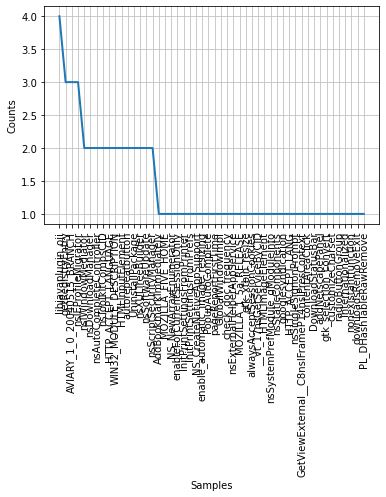

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [41]:
# Consider words with length greater than 3 and plot
large_words = dict([(k,v) for k,v in frequency_dist.items()
                    if len(k)>15])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

In [12]:
# Load in the dataframe
df = pd.read_csv("D:/Dataset/winemag-data/winemag-data-130k-v2.csv",
                 index_col=0)
print(df.shape)
print(df.shape[0])
# df.head() # top five rows
# df.tail() # last five rows
df.take([1,5,100,10000]) # selected rows

(129971, 13)
129971


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
100,US,"Fresh apple, lemon and pear flavors are accent...",NaN,88,18.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Ventosa 2015 Pinot Gris (Finger Lakes),Pinot Gris,Ventosa
10000,France,"This is a smooth, ripe, and rounded wine that'...",Blanc de Noirs Grand Cru Brut,91,NaN,Champagne,Champagne,NaN,Roger Voss,@vossroger,Henriet-Bazin NV Blanc de Noirs Grand Cru Brut...,Pinot Noir,Henriet-Bazin


In [39]:
print("There are {} observations and {} features in this dataset. \n"
      .format(df.shape[0],df.shape[1]))

There are 129971 observations and 13 features in this dataset. 



In [38]:
print("There are {} types of wine in this dataset such as {}...\n"
      .format(len(df.variety.unique()),
       ", ".join(df.variety.unique()[0:10])))

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir, Tempranillo-Merlot, Frappato, Gewürztraminer, Cabernet Sauvignon, Nerello Mascalese... 



In [37]:
print("There are {} countries producing wine in this dataset such as {}...\n"
      .format(len(df.country.unique()),
        ", ".join(df.country.unique()[0:15])))

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France, Germany, Argentina, Chile, Australia, Austria, South Africa, New Zealand, Israel, Hungary, Greece... 



In [13]:
df1=df[["country", "description","points"]]
df1.shape

(129971, 3)

In [14]:
# Groupby by country
country = df.groupby("country")
# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [15]:
country.mean().sort_values(by="points",ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


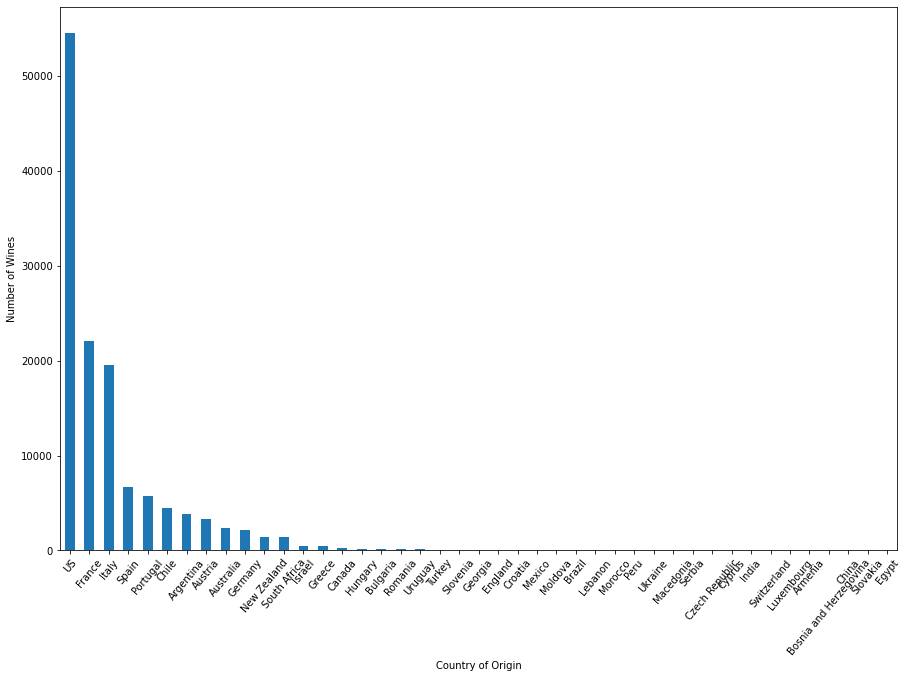

In [16]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

In [17]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review."
       .format(len(text)))

There are 31661073 words in the combination of all review.


In [18]:
# total NaN values in column 'Title'
print(df['region_1'].isnull().sum())

21247


In [19]:
# total NaN values in row index 1
print(df.loc[:,:].isnull().sum())

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [20]:
#Finding the mean of the column having NaN
mean_value=df['price'].mean()
  
# Replace NaNs in column  with the mean of values in the same column
df['price'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')

Updated Dataframe:


In [21]:
# total NaN values in row index 1
print(df.loc[:,:].isnull().sum())

country                     63
description                  0
designation              37465
points                       0
price                        0
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [22]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<AxesSubplot:>

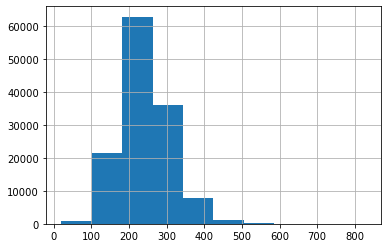

In [23]:
# Histogram for the number of characters present in each sentence in discriptions 
df['description'].str.len().hist()

<AxesSubplot:>

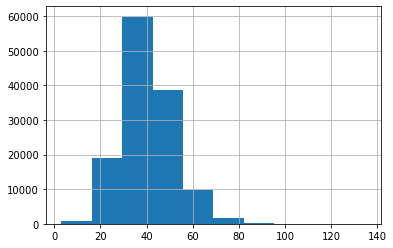

In [25]:
# the number of words appearing in sentences of discriptions
df['description'].str.split().\
    map(lambda x: len(x)).\
    hist()

<BarContainer object of 10 artists>

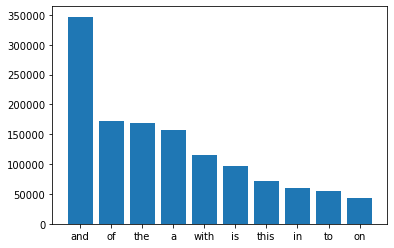

In [28]:
# display bar chart of  top 10 stopwords.
stop=set(stopwords.words('english'))

corpus=[]
new= df['description'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot:>

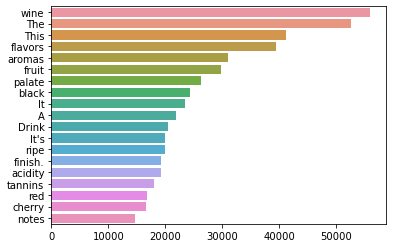

In [30]:
# top 40 words other than stopwords occur frequently.
import collections
import seaborn as sns
counter=collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

## Ngram exploration

In [31]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

<AxesSubplot:>

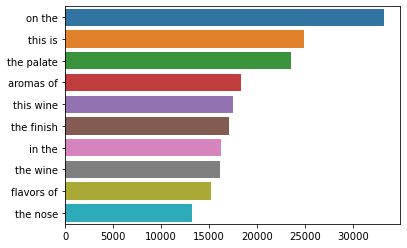

In [35]:
# the top bigrams in description.
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(df['description'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

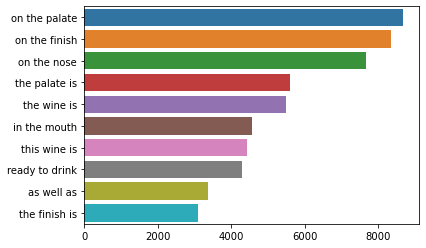

In [36]:
top_tri_grams=get_top_ngram(df['description'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)